In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import  datasets
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [3]:
iris = datasets.load_iris()
iris1 = pd.DataFrame(iris.data)
iris1.columns = iris.feature_names
iris1.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Problem 1: 
# Write a program such that different training variables
# such as "mxdepth" for DecisionTreeClassifier and "k" for KNN classifier 
# can have consecutive values being experimented. For example, rewrite the
# following code so that mxdepth starts from 1 to 10 or k goes from 1 to 10
# You will need to plot the accuracy per varying these parameters of each classifier 
# with your analysis in words

In [81]:
#iris = load_iris()
X = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [82]:
mxdepth = 1
classifier1 = DecisionTreeClassifier(max_depth=mxdepth)
classifier1.fit(x_train,y_train)
predictions=classifier1.predict(x_test)
print(f"DTC ({mxdepth}) = %0.2f accuracy" % accuracy_score(y_test,predictions))

DTC (1) = 0.58 accuracy


In [83]:
k = 1
classifier2 = KNeighborsClassifier(n_neighbors=k)
classifier2.fit(x_train,y_train)
predictions=classifier2.predict(x_test)
print(f"KNN ({k}) = %0.2f accuracy" % accuracy_score(y_test,predictions))

KNN (1) = 0.97 accuracy


In [84]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 11))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:    
    #clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    #clf.fit(x_train, y_train)

    classifier1 = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    classifier1.fit(x_train,y_train)
    predictions=classifier1.predict(x_test)
    #score = classifier1.score(x_test, y_test)
    #score.append(accuracy_score(y_test, predictions))
    accuracy.append(accuracy_score(y_test, predictions))

    #score = clf.score(x_test, y_test)
    #accuracy.append(score)
print(accuracy)

[0.5789473684210527, 0.8947368421052632, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


In [85]:
# try K=1 through K=10 and record testing accuracy
k_range = list(range(1, 11))

scores = {}
scores_list = []
#scores = []

for k in k_range:
    classifier2 = KNeighborsClassifier(n_neighbors=k)
    classifier2.fit(x_train,y_train)
    predictions=classifier2.predict(x_test)
    scores[k] = accuracy_score(y_test,predictions)
    scores_list.append(accuracy_score(y_test,predictions))

    #scores.append(accuracy_score(y_test, predictions))
print(scores)


{1: 0.9736842105263158, 2: 0.9736842105263158, 3: 0.9736842105263158, 4: 0.9736842105263158, 5: 0.9736842105263158, 6: 0.9736842105263158, 7: 0.9736842105263158, 8: 0.9736842105263158, 9: 0.9736842105263158, 10: 0.9736842105263158}


In [87]:
scores

{1: 0.9736842105263158,
 2: 0.9736842105263158,
 3: 0.9736842105263158,
 4: 0.9736842105263158,
 5: 0.9736842105263158,
 6: 0.9736842105263158,
 7: 0.9736842105263158,
 8: 0.9736842105263158,
 9: 0.9736842105263158,
 10: 0.9736842105263158}

In [ ]:
# Problem 2: 
# The data contains 4 different features namely 
# sepal length, sepal width, petal length, and petal width
# It is important to recognize which feature set(s) performs the best. Choose the best combination based on your
# experiment. You will have 10 different combinations possible 
# (e.g. {SL, SW, PL, PW, (SL,SW), (SL, PL)...(SL, SW, PL, PW)} 
# You will show different performance after based on the best training parameters from Problem #1.
# This may show that the more number of features doesn't end up with better accuracy necessarily. 
# You will have the performance results per 10 combinations and plot the results on a graph for each classifier.
# with your analysis in words.

In [12]:
x=iris.data   # data that contains 4 features of 150 samples. 
y=iris.target # labels with ground truth information

# split the data into split% training and (100-split)% testing
split = 0.9

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.9, random_state=4)

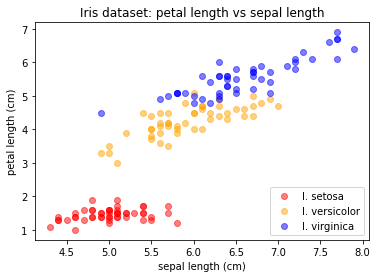

In [89]:
#iris = datasets.load_iris()
df = pd.read_csv('Iris.csv')
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

colours = ['red', 'orange', 'blue']
species = ['I. setosa', 'I. versicolor', 'I. virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['species'] == i]    
    plt.scatter(        
        species_df['sepal length (cm)'],        
        species_df['petal length (cm)'],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Iris dataset: petal length vs sepal length')
plt.legend(loc='lower right')

plt.show()

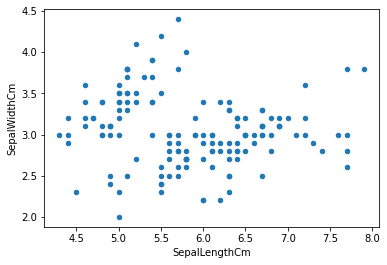

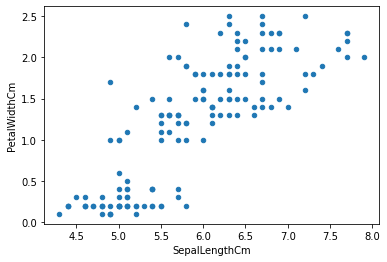

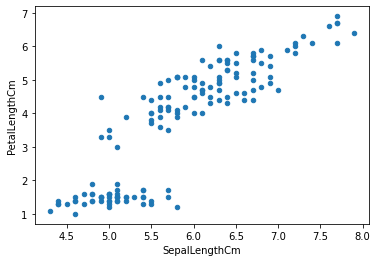

In [90]:
iris2 = pd.read_csv("Iris.csv") 
# (e.g. {SL, SW, PL, PW, (SL,SW), (SL, PL)...(SL, SW, PL, PW)} 
iris2.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
iris2.plot(kind="scatter", x="SepalLengthCm", y="PetalWidthCm")
iris2.plot(kind="scatter", x="SepalLengthCm", y="PetalLengthCm")


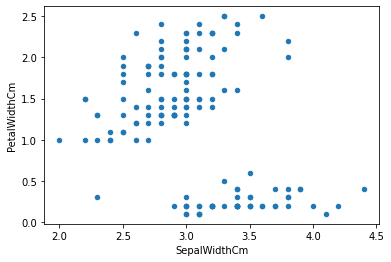

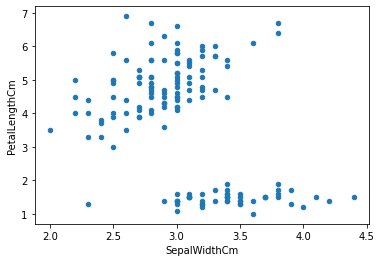

In [91]:
iris2.plot(kind="scatter", x="SepalWidthCm", y="PetalWidthCm")
iris2.plot(kind="scatter", x="SepalWidthCm", y="PetalLengthCm")

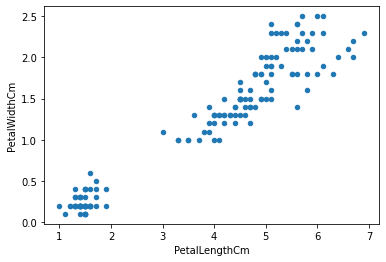

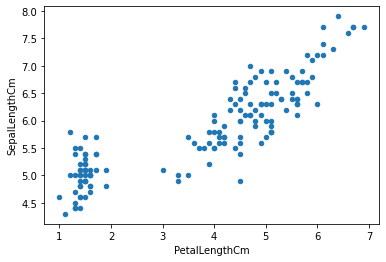

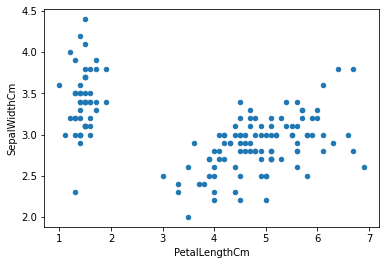

In [92]:
iris2.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")
iris2.plot(kind="scatter", x="PetalLengthCm", y="SepalLengthCm")
iris2.plot(kind="scatter", x="PetalLengthCm", y="SepalWidthCm")

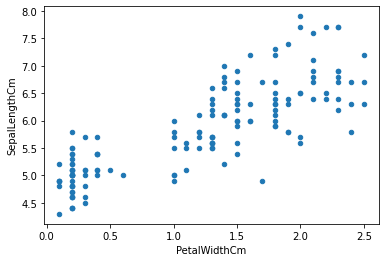

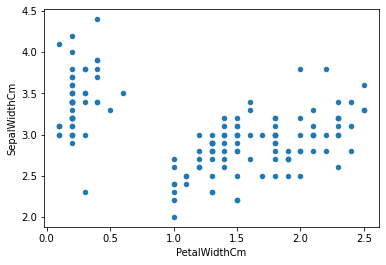

In [93]:
iris2.plot(kind="scatter", x="PetalWidthCm", y="SepalLengthCm")
iris2.plot(kind="scatter", x="PetalWidthCm", y="SepalWidthCm")

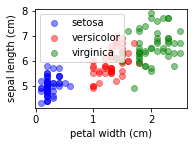

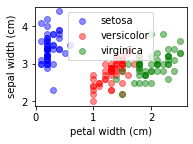

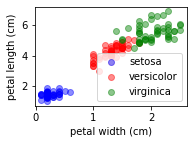

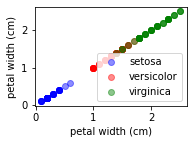

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iri2 = load_iris() 
colors = ['blue', 'red', 'green']

feature_x= 3 
for feature_y in range(iris.data.shape[1]):
    plt.subplot(2, 2, feature_y+1) 
    for label, color in zip(range(len(iris.target_names)), colors):
        
        plt.scatter(iris.data[iris.target==label, feature_x],
                    iris.data[iris.target==label, feature_y],
                    label=iris.target_names[label],
                    alpha = 0.45, # transparency
                    color=color)
    plt.xlabel(iris.feature_names[feature_x])
    plt.ylabel(iris.feature_names[feature_y])
    plt.legend()
    plt.show()

In [ ]:
# Problem 3: 
# Once you decide the best feature set(s) from the Problem #2, it is important to recognize 
# how the size of training set versus testing set (or ratio between sets) would influence the
# overall representative performance. You will have the performance results per 10%, 20% ... 90% 
# and plot the results on a graph for each classifier with your analysis in words.

In [98]:
# overall representative performance. You will have the performance results per 10%, 20% ... 90% 
split1 = 0.1
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(15, 4)
(135, 4)
(135,)
(15,)


In [99]:
split2 = 0.2
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(15, 4)
(135, 4)
(120,)
(30,)


In [102]:
split3 = 0.3
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)





(15, 4)
(135, 4)
(105,)
(45,)


In [101]:
split4 = 0.4
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(90,)
(60,)


In [103]:
split5 = 0.5
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(75,)
(75,)


In [104]:
split6 = 0.6
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split6)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(60,)
(90,)


In [105]:
split7 = 0.7
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(45,)
(105,)


In [106]:
split8 = 0.8
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split8)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)




(15, 4)
(135, 4)
(30,)
(120,)


In [107]:
split9 = 0.9
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split9)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 4)
(135, 4)
(15,)
(135,)
